**Scipy:**

**We have the min and max temperatures in a city In India for each months of the year.**
**We would like to find a function to describe this and show it graphically, the dataset given below.**

**Task:<br>
1.fitting it to the periodic function<br>
2.plot the fit Data<br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18**

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
%matplotlib inline

In [25]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(12)

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
print(res_max)
print(res_min)

[ 39.10062829 -11.0872493    2.10332481]
[24.87112259 -7.89899664  1.60673368]


Text(0, 0.5, 'Temperature (°C)')

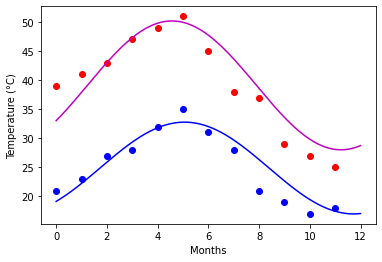

In [31]:
days=np.linspace(0, 12,num=365)
plt.figure()
plt.plot(months,temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')

**Matplotlib:**<br>
**This assignment is for visualization using matplotlib:
data to use:**
<https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv>

**titanic = pd.read_csv(url)**<br>
**Charts to plot:**<br>
**1. Create a pie chart presenting the male/female proportion**<br>
**2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**

In [32]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [33]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [36]:
sex=round((titanic['sex'].value_counts())/len(titanic)*100,2)
pd.DataFrame(sex)

,sex
male,64.35
female,35.57


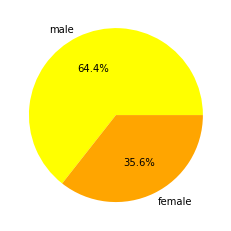

In [45]:
labels=['male','female']
size=titanic.sex.value_counts()
fig1, ax1= plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%', colors=['Yellow','Orange'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

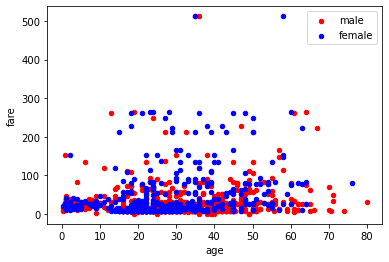

In [50]:
plt.figure()
category1= titanic[titanic.sex == 'male'].plot.scatter('age','fare', color='Red', label='male')
titanic[titanic.sex == 'female'].plot.scatter('age','fare', color='Blue',label='female', ax=category1)